Consider the handwritten digits dataset in the following

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
X_training = digits.data
print(X_training.shape)

(1797, 64)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def plot_digits(data, num_x, num_y):
    fig, ax = plt.subplots(num_x, num_y, figsize=(num_y, num_x),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(X_training,8,10)

+ The dimension of data 64 is quite high. Please use PCA to reduce the dimension to 30 and store the new data in Z_training with size 1797 by 30.
+ Please use K-means clustering method to separate the new data Z_training into 20 clusters.
+ Please use GMM method to separate the new data Z_training into 20 clusters.

Note: for both K-means and GMM, please try at least 20 differnt initial values and select the
best one among them.

In [3]:
# PCA
cov = np.cov(X_training.T)
u,v = LA.eig(cov)
pca_direc = v[0:30,:].T
Z_training = np.dot(X_training, pca_direc)
print(np.shape(Z_training))

(1797, 30)


In [4]:
# K-means
# find initial central
class_num=20
Ctrd=np.zeros([class_num,30])
for i in range(30):
    Ctrd[:,i]=np.random.uniform(min(X_training[:,i]),max(X_training[:,i]),class_num)
Ctrd_old=np.zeros(Ctrd.shape) # store the old centroids
error=LA.norm(Ctrd-Ctrd_old)
label = np.zeros([len(Z_training),class_num])  # store label
ite = 0             # store iterate number

beta = 2
while error > 1e-6:
    # assign the class for each point
    for i in range(len(Z_training)):
        distances=np.exp(-beta*LA.norm(Ctrd - Z_training[i,:], axis=1))
        label[i,:]=distances/np.sum(distances)
        
    Ctrd_old=Ctrd.copy() # store the old centroids
    
    # update the central
    for j in range(class_num):
        Ctrd[j,:] = np.dot(label[:,j].T, Z_training)/sum(label[:,j])
    
    # error
    error = LA.norm(Ctrd - Ctrd_old)

    ite = ite + 1  

print(ite)

205


[ 90. 132.  97.  67. 174.  75. 123.  91.  69.  86.  45.  43.  68. 103.
  99.  77.  88.  87. 105.  78.]


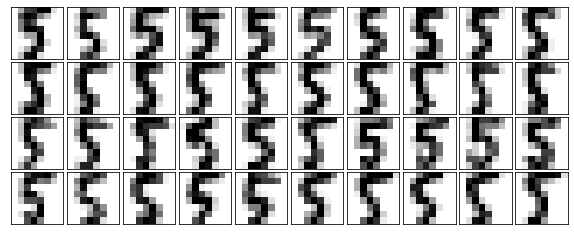

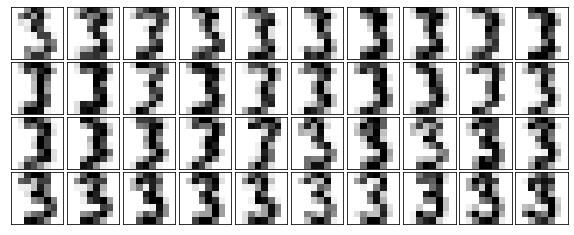

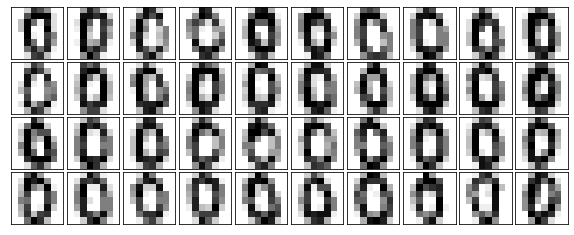

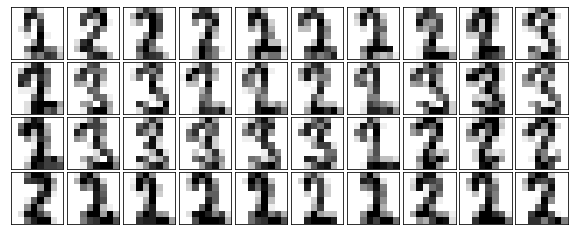

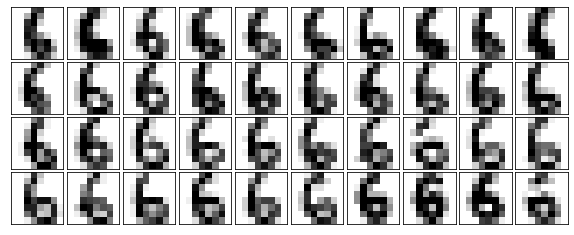

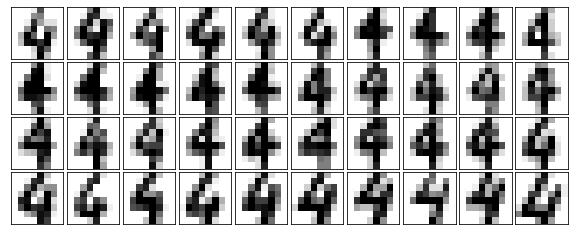

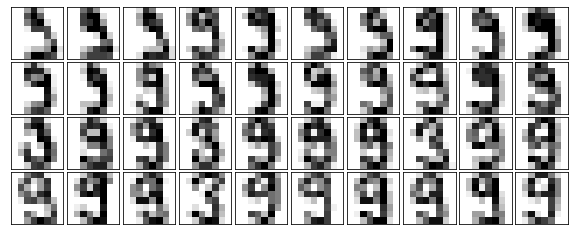

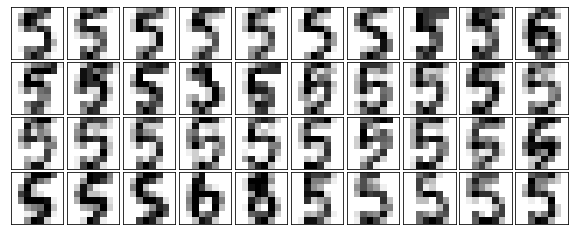

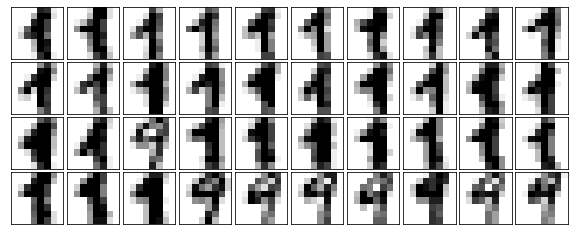

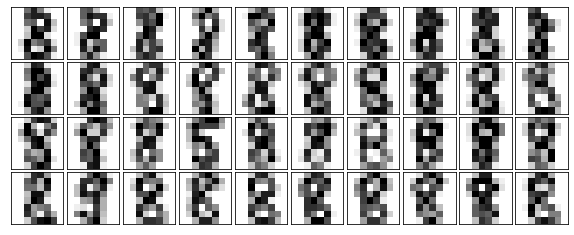

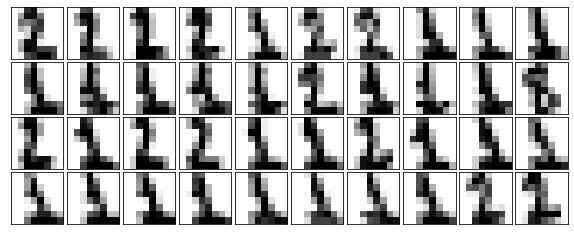

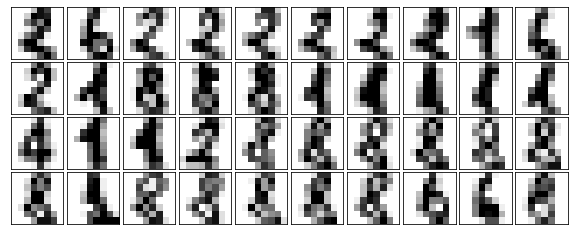

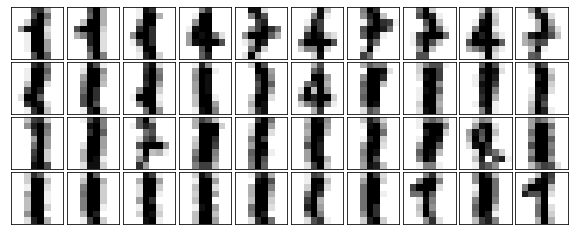

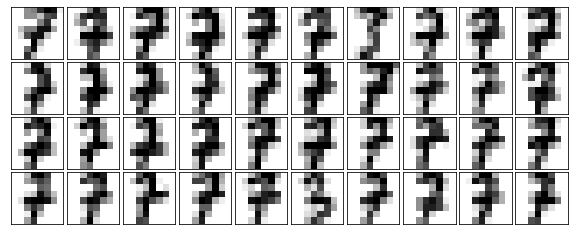

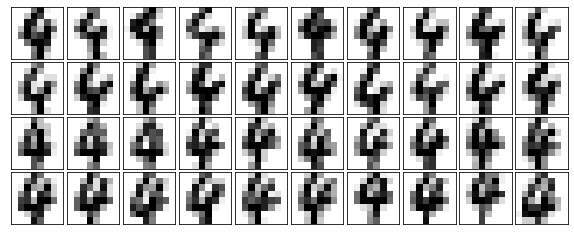

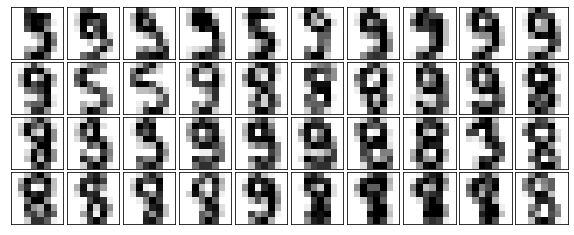

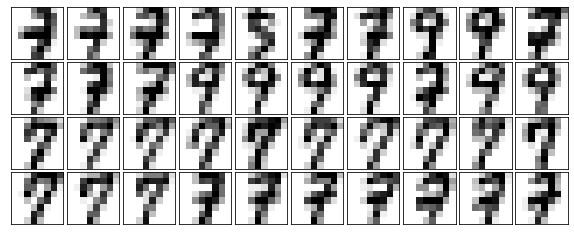

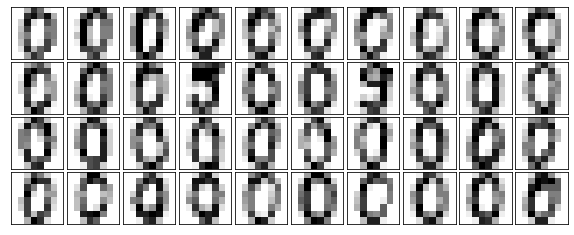

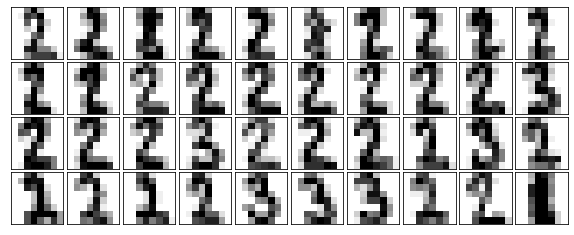

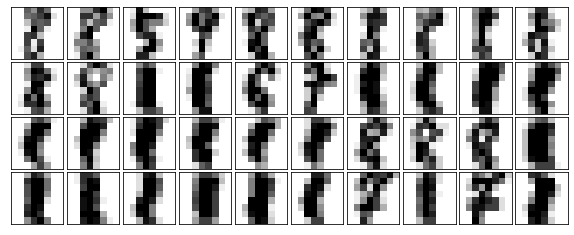

In [5]:
label1 = np.argmax(label, axis = 1)
num_clu = np.zeros(class_num)
cluster = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(class_num):
    for j in range(len(label1)):
        if label1[j]==i:
            num_clu[i] = num_clu[i]+1
            cluster[i].append(X_training[j,:])
print(num_clu)

for i in range(class_num):
    plot_digits(cluster[i], 4, 10)   

In [6]:
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix

In [9]:
# GMM
# define the number of clusters to be learned
k = 20
pp = np.ones([k,1]) / k

n,d = np.shape(Z_training)
t_means = (np.max(Z_training)-np.min(Z_training))*np.random.random([k,d]) + np.min(Z_training)
# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(k):
    #t_means.append(np.zeros(d))
    #t_covs.append(np.eye(d))
    t_covs.append(make_spd_matrix(d))


R = np.zeros([n,k])
NN = np.ones([n,k])


for j in range(300):

    for l in range(k):
        NN[:,l] = multivariate_normal.pdf(x=Z_training, mean=t_means[l], cov=t_covs[l], allow_singular=True)
    for i in range(n):
        for j1 in range(k):
            R[i,j1] = pp[j1]*NN[i,j1]/(NN[i,:]@pp)                                         
    # update pp
    
    # update mu and sigma
    for l in range(k):
        pp[l] = np.sum(R[:,l])/n
        t_covs[l] = np.dot((Z_training-t_means[l]).T, np.dot(np.diag(R[:,l]),Z_training-t_means[l]))/np.sum(R[:,l])
        t_means[l] = np.dot(R[:,l].T, Z_training)/np.sum(R[:,l])
    
    

C:\Users\rfang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


ValueError: array must not contain infs or NaNs

In [ ]:
np.sum(R, axis = 1)

In [ ]:
label1 = np.argmax(R, axis = 1)
num_clu = np.zeros(class_num)
cluster = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(class_num):
    for j in range(len(label1)):
        if label1[j]==i:
            num_clu[i] = num_clu[i]+1
            cluster[i].append(X_training[j,:])
print(num_clu)

for i in range(class_num):
    plot_digits(cluster[i], 3, 10)  

It looks like the cluster is not good, may be the reason is the data do not accord with the assumption, which is P(x_j|y_l=1) is a Gauss distribution.

In [11]:
# 30 dimension is to large, this time we reduce the dimension to 10
# PCA
cov = np.cov(X_training.T)
u,v = LA.eig(cov)
pca_direc = v[0:10,:].T
Z_new = np.dot(X_training, pca_direc)
print(np.shape(Z_new))

# GMM
# define the number of clusters to be learned
k = 20
pp = np.ones([k,1]) / k
Z_training = Z_new

n,d = np.shape(Z_training)
t_means = (np.max(Z_training)-np.min(Z_training))*np.random.random([k,d]) + np.min(Z_training)
# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(k):
    #t_means.append(np.zeros(d))
    #t_covs.append(np.eye(d))
    t_covs.append(make_spd_matrix(d))


R = np.zeros([n,k])
NN = np.ones([n,k])


for j in range(300):

    for l in range(k):
        NN[:,l] = multivariate_normal.pdf(x=Z_training, mean=t_means[l], cov=t_covs[l], allow_singular=True)
    for i in range(n):
        for j1 in range(k):
            R[i,j1] = pp[j1]*NN[i,j1]/(NN[i,:]@pp)                                         
    # update pp
    
    # update mu and sigma
    for l in range(k):
        pp[l] = np.sum(R[:,l])/n
        t_covs[l] = np.dot((Z_training-t_means[l]).T, np.dot(np.diag(R[:,l]),Z_training-t_means[l]))/np.sum(R[:,l])
        t_means[l] = np.dot(R[:,l].T, Z_training)/np.sum(R[:,l])
    

(1797, 10)


C:\Users\rfang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


ValueError: array must not contain infs or NaNs

[1292.   28.    0.  118.    0.    0.    0.    0.    0.    0.    0.  283.
    0.   25.    0.    0.    0.    0.   51.    0.]


IndexError: list index out of range

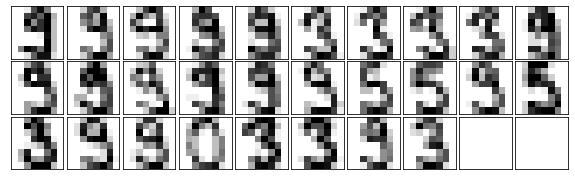

In [12]:
label1 = np.argmax(R, axis = 1)
num_clu = np.zeros(class_num)
cluster = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(class_num):
    for j in range(len(label1)):
        if label1[j]==i:
            num_clu[i] = num_clu[i]+1
            cluster[i].append(X_training[j,:])
print(num_clu)

for i in range(class_num):
    plot_digits(cluster[1], 3, 10)  

It looks like the cluster is still not good